In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class LogisticRegression:
    def __init__(self, x, y):
        self.intercept = np.ones((x.shape[0], 1))
        #thêm cột 1
        self.x = np.concatenate((self.intercept, x), axis=1) 
        self.w = np.zeros(self.x.shape[1])
        self.y = y
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def loss(self, y_hat, y):
        return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()
    
    def gradient_descent(self, X, y_hat, y):
        return (X.T@(y_hat - y)) / y.shape[0]
    
    def logistic_regression(self, learning_rate, iterations):
        for i in range(1, iterations):
            sigma = self.sigmoid(np.dot(self.x, self.w))
            loss = self.loss(sigma, self.y)
            dW = self.gradient_descent(self.x, sigma, self.y)
            self.w = self.w - learning_rate * dW
        print(f"Error: {loss}\nParameters: {self.w}")
    
    def predict(self, x_new , thresh):
        x_new = np.concatenate((self.intercept, x_new), axis=1)
        return [1 if i > 0.5 else 0 for i in self.sigmoid(np.dot(x_new, self.w))]
    
    def boundary(self, t, x_):
        bound = -(self.w[0] + self.w[1]*x_+ np.log(1/t-1))/self.w[2]
        return bound

In [3]:
df = pd.read_csv('dataset.csv.zip')
df

,Lương,Thời gian làm việc,Cho vay
0,10,1.00,1
1,5,2.00,1
2,6,1.80,1
3,7,1.00,1
4,8,2.00,1
5,9,0.50,1
6,4,3.00,1
7,5,2.50,1
8,8,1.00,1
9,4,2.50,1


In [4]:
x = df.values[:,0:2]
y = df.values[:, 2]
L = LogisticRegression(x,y)
L.logistic_regression(0.1, 1000)

Error: 0.23405324401940142
Parameters: [-4.57355133  0.3292139   2.81813478]


In [5]:
y_pred = L.predict(x, 0.5)
accuracy = sum(y_pred == y) / y.shape[0]
print(f'Accurate at {accuracy}')
print(y_pred)

Accurate at 0.95
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


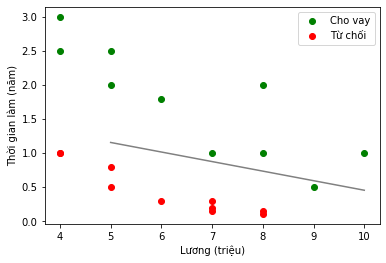

In [6]:
#cho vay = 1, từ chối = 0
x_1 = x[y==1] 
x_0 = x[y==0]
#x[:,0]: lương, x[:,1]: thời gian làm
plt.scatter(x_1[:, 0], x_1[:, 1], c='green', label='Cho vay')
plt.scatter(x_0[:, 0], x_0[:, 1], c='red', label='Từ chối')
plt.legend(loc='upper right')
plt.xlabel('Lương (triệu)')
plt.ylabel('Thời gian làm (năm)')
plt.plot((5, 10), (L.boundary(0.5, 4), L.boundary(0.5, 10)), c='gray')
plt.show()